# Algorithm for DNA sequencing Course 

These are the coding examples and exercises given in the Algorithm for DNA sequencing course in the Genomic Data Science specialization on coursera


# Module 1

In [1]:
# Function for finding the longest common prefix between two sets of reads

def longestCommonPrefix(s1, s2):
    i = 0     
    while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
        i += 1
    return s2[:i]

longestCommonPrefix('ACCTGOTALKD', 'ACCTGWDHSH')

'ACCTG'

In [2]:
# Function to determine if 2 sets of reads are the same

def match (s1, s2):
    if not len(s1) == len(s2):
        return False
    
    for i in range(len(s1)):
        if not s1[i] == s2[i]:
            return False
        
    return True

match('ACCTGOTALKD', 'ACCTGOTALKD')
        

True

In [3]:
complement = {'A':'T', 'C':'G', 'G':'C', 'T':'A'}
complement['A']

'T'

In [4]:
# Function to get the reverseComplement of a read

def reverseComplement(a):
    complement = {'A':'T', 'C':'G', 'G':'C', 'T':'A'}
    t = ''
    for base in a:
        t = complement[base] + t
    return t

reverseComplement('AGCTT')

'AAGCT'

In [5]:
import os
os.listdir('/kaggle/input/')

['genome3',
 'genome5',
 'genome1',
 'genome2',
 'genome7',
 'lambda-virus',
 'genome6',
 'chromosome1']

In [6]:
# Function for reading the genome from a fasta file

def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

genome = readGenome('/kaggle/input/lambda-virus/lambda_virus.fa')
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [7]:
len(genome)

48502

In [8]:
# Function for counting each base in a read

counts = {'A':0, 'C':0, 'G':0, 'T':0}

for base in genome:
    counts[base] += 1
print(counts)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


In [9]:
import collections
collections.Counter(genome)

Counter({'G': 12820, 'A': 12334, 'T': 11986, 'C': 11362})

In [10]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open (filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

seqs, quals = readFastq('/kaggle/input/genome1/SRR835775_1.first1000.fastq')

print(len(quals[0]))

print(quals[:5])

100
['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']


In [11]:
# Function to convert ASCII symbols to quality value for the reads
def phred33ToQ(qual):
    return ord(qual) - 33

phred33ToQ('#')


2

In [12]:
phred33ToQ('J')

41

In [13]:
def createHist(qualities):
    hist = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist

h = createHist(quals)

print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


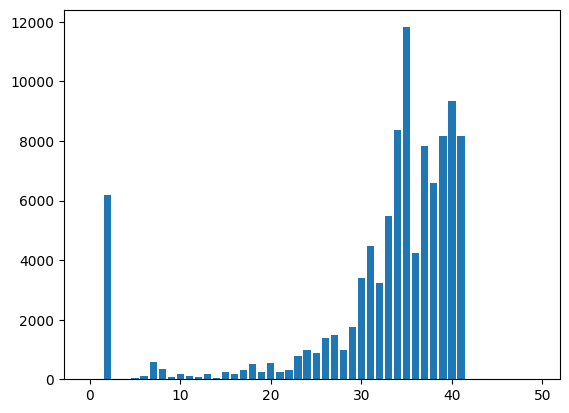

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

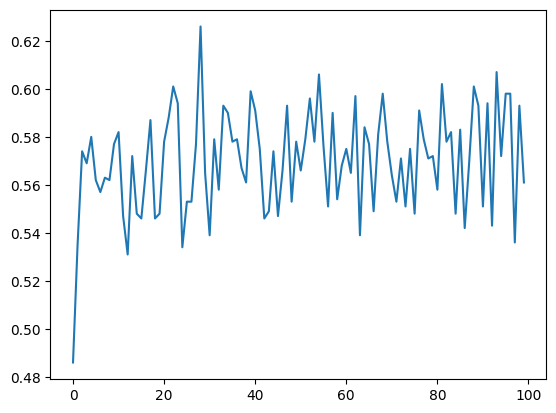

In [15]:
# Function to map the GC content in a collection of reads
def findGCByPos(reads):
    gc = [0] * 100
    totals = [0] * 100

    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1

    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])

    return gc

gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

In [16]:
# Counting the freq of each base in the read (N is for no-confidence-bases)
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
print(count)

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})


In [17]:
# Reading genome from new read

def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

genome = readGenome('/kaggle/input/genome2/phix.fa')
genome[:100]

'GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGAGTCGAAAAATTATCTTGATAAAGCAGGAATTACTACTGCTTGTTTA'

In [18]:
# Function to implement naive exact matching algorithm of a pattern p on  text t                        

def naive(p, t):
    occurences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if not t[i+j] == p[j]:
                match = False
                break
        if match:
            occurences.append(i)
    return occurences


In [19]:
t = 'AGCTTAGAGC'
p = 'AG'

naive(p,t)

[0, 5, 7]

In [20]:
# Function to 
import random
def generateReads(genome, numReads, readLen):
    ''' Generate reads from random positions in the given genome. '''
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome)-readLen) - 1
        reads.append(genome[start : start+readLen])
    return reads

In [21]:
reads = generateReads(genome, 100, 100)

numMatched = 0

for r in reads:
    matches = naive(r, genome)
    if len(matches) > 0:
        numMatched += 1
print ('%d / %d reads matched' % (numMatched, len(reads)))
        

100 / 100 reads matched


In [22]:
phix_reads, _ = readFastq('/kaggle/input/genome3/ERR266411_1.first1000_2.fastq')
# print(phix_reads)

In [23]:
def reverseComplement(a):
    complement = {'A':'T', 'C':'G', 'G':'C', 'T':'A', 'N':'N'}
    t = ''
    for base in a:
        t = complement[base] + t
    return t

reverseComplement('AGCTT')

'AAGCT'

In [24]:
# Matching the sequenced reads to the reference genome
numMatched = 0
n= 0
for r in phix_reads:
    r = r[:30] # taking only the first part of the reads to get more values
    matches = naive(r, genome)
    matches.extend(naive(reverseComplement(r), genome))
    n += 1
    if len(matches) > 0:
        numMatched += 1
        
print ('%d / %d reads matched' % (numMatched, n))

932 / 1000 reads matched


# Module 2

In [25]:
import string

def z_array(s):
    """ Use Z algorithm (Gusfield theorem 1.4.1) to preprocess s """
    assert len(s) > 1
    z = [len(s)] + [0] * (len(s)-1)
    # Initial comparison of s[1:] with prefix
    for i in range(1, len(s)):
        if s[i] == s[i-1]:
            z[1] += 1
        else:
            break
    r, l = 0, 0
    if z[1] > 0:
        r, l = z[1], 1
    for k in range(2, len(s)):
        assert z[k] == 0
        if k > r:
            # Case 1
            for i in range(k, len(s)):
                if s[i] == s[i-k]:
                    z[k] += 1
                else:
                    break
            r, l = k + z[k] - 1, k
        else:
            # Case 2
            # Calculate length of beta
            nbeta = r - k + 1
            zkp = z[k - l]
            if nbeta > zkp:
                # Case 2a: Zkp wins
                z[k] = zkp
            else:
                # Case 2b: Compare characters just past r
                nmatch = 0
                for i in range(r+1, len(s)):
                    if s[i] == s[i - k]:
                        nmatch += 1
                    else:
                        break
                l, r = k, r + nmatch
                z[k] = r - k + 1
    return z


def n_array(s):
    """ Compile the N array (Gusfield theorem 2.2.2) from the Z array """
    return z_array(s[::-1])[::-1]


def big_l_prime_array(p, n):
    """ Compile L' array (Gusfield theorem 2.2.2) using p and N array.
        L'[i] = largest index j less than n such that N[j] = |P[i:]| """
    lp = [0] * len(p)
    for j in range(len(p)-1):
        i = len(p) - n[j]
        if i < len(p):
            lp[i] = j + 1
    return lp


def big_l_array(p, lp):
    """ Compile L array (Gusfield theorem 2.2.2) using p and L' array.
        L[i] = largest index j less than n such that N[j] >= |P[i:]| """
    l = [0] * len(p)
    l[1] = lp[1]
    for i in range(2, len(p)):
        l[i] = max(l[i-1], lp[i])
    return l


def small_l_prime_array(n):
    """ Compile lp' array (Gusfield theorem 2.2.4) using N array. """
    small_lp = [0] * len(n)
    for i in range(len(n)):
        if n[i] == i+1:  # prefix matching a suffix
            small_lp[len(n)-i-1] = i+1
    for i in range(len(n)-2, -1, -1):  # "smear" them out to the left
        if small_lp[i] == 0:
            small_lp[i] = small_lp[i+1]
    return small_lp


def good_suffix_table(p):
    """ Return tables needed to apply good suffix rule. """
    n = n_array(p)
    lp = big_l_prime_array(p, n)
    return lp, big_l_array(p, lp), small_l_prime_array(n)


def good_suffix_mismatch(i, big_l_prime, small_l_prime):
    """ Given a mismatch at offset i, and given L/L' and l' arrays,
        return amount to shift as determined by good suffix rule. """
    length = len(big_l_prime)
    assert i < length
    if i == length - 1:
        return 0
    i += 1  # i points to leftmost matching position of P
    if big_l_prime[i] > 0:
        return length - big_l_prime[i]
    return length - small_l_prime[i]


def good_suffix_match(small_l_prime):
    """ Given a full match of P to T, return amount to shift as
        determined by good suffix rule. """
    return len(small_l_prime) - small_l_prime[1]


def dense_bad_char_tab(p, amap):
    """ Given pattern string and list with ordered alphabet characters, create
        and return a dense bad character table.  Table is indexed by offset
        then by character. """
    tab = []
    nxt = [0] * len(amap)
    for i in range(0, len(p)):
        c = p[i]
        assert c in amap
        tab.append(nxt[:])
        nxt[amap[c]] = i+1
    return tab


class BoyerMoore(object):
    """ Encapsulates pattern and associated Boyer-Moore preprocessing. """
    
    def __init__(self, p, alphabet='ACGT'):
        self.p = p
        self.alphabet = alphabet
        # Create map from alphabet characters to integers
        self.amap = {}
        for i in range(len(self.alphabet)):
            self.amap[self.alphabet[i]] = i
        # Make bad character rule table
        self.bad_char = dense_bad_char_tab(p, self.amap)
        # Create good suffix rule table
        _, self.big_l, self.small_l_prime = good_suffix_table(p)
    
    def bad_character_rule(self, i, c):
        """ Return # skips given by bad character rule at offset i """
        assert c in self.amap
        ci = self.amap[c]
        assert i > (self.bad_char[i][ci]-1)
        return i - (self.bad_char[i][ci]-1)
    
    def good_suffix_rule(self, i):
        """ Given a mismatch at offset i, return amount to shift
            as determined by (weak) good suffix rule. """
        length = len(self.big_l)
        assert i < length
        if i == length - 1:
            return 0
        i += 1  # i points to leftmost matching position of P
        if self.big_l[i] > 0:
            return length - self.big_l[i]
        return length - self.small_l_prime[i]
    
    def match_skip(self):
        """ Return amount to shift in case where P matches T """
        return len(self.small_l_prime) - self.small_l_prime[1]

In [26]:
# GCTAGGCTC
# TCAA

p = 'TCAA'
p_bm = BoyerMoore(p)
p_bm.bad_character_rule(2, 'T')

2

In [27]:
# GCTAGGCTC
# ACTA
p = 'ACTA'
p_bm = BoyerMoore(p)
p_bm.good_suffix_rule(0)

3

In [28]:
# ACACGCTC
# ACAC
p = 'ACAC'
# p_bm = BoyerMoore(p)
p_bm.match_skip()

3

In [29]:
def boyer_moore(p, p_bm, t):
    i = 0
    occurences = []
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1,-1):
            if not p[j] == t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
        
    return occurences
                

In [30]:
t = 'GCTAGCTCTACGAGTCTA'
p = 'TCTA'
p_bm = BoyerMoore(p, alphabet='ACGT')
boyer_moore(p, p_bm, t)

[6, 14]

In [31]:
t[6:10]
t[14:18]

'TCTA'

In [32]:
# Module for building a k-mer index

import bisect

class Index(object):
    def __init__(self, t, k):
        self.k = k
        self.index = []
        for i in range(len(t) - k + 1):
            self.index.append((t[i:i+k], i))
        self.index.sort()
        
    def query(self, p):
        kmer = p[:self.k]
        i = bisect.bisect_left(self.index, (kmer, -1))
        hits = []
        while   i < len(self.index):
            if self.index[i][0] != kmer:
                break
            hits.append(self.index[i][1])
            i += 1
        return hits

In [33]:
def queryIndex(p, t, index):
    k = index.k
    offsets = []
    for i in index.query(p):
        if p[k:] == t[i+k: i+len(p)]:
            offsets.append(i)
    return offsets

In [34]:
t = 'ACTTGGAGATCTTTGAGGCTAGGTATTCGGGATCGAAGCTCATTTCGGGGATCGATTACGATATGGTGGGTATTCGGGA'
p = 'GGTATTCGGGA'

index = Index(t, 2)
# print(queryIndex(p, t, index))
print(index)

In [35]:

t[21:32]


'GGTATTCGGGA'

In [36]:
#PigeonHole Principle

def approximate_match(p, t, n):
    
    segment_length = round(len(p) / (n+1))
    all_matches = set()
    for i in range(n+1):
        start = i*segment_length
        end = min((i+1)*segment_length, len(p))
        p_bm = BoyerMoore(p[start:end], alphabet='ACGT')
        matches = boyer_moore(p[start:end], p_bm, t)
        
        for m in matches:
            if m < start or m-start+len(p) > len(t):
                continue
                
            mismatches = 0
            for j in range(0, start):
                if not p[j] == t[m-start+j]:
                    mismatches +=1
                    if mismatches > n:
                        break
            
            for j in range(end, len(p)):
                if not p[j] == t[m-start+j]:
                    mismatches += 1
                    if mismatches > n:
                        break
                        
            if mismatches <= n:
                all_matches.add(m-start)
    return list(all_matches)

In [37]:
p = 'AACTTG'
t = 'CACTTAATTTG'

print(approximate_match(p, t, 2))

[0, 5]


In [38]:
# p = 'GGCGCGGTGGCTCACGCCTGTAAT'
# t = chromosome

# print(approximate_match(p, t, 2))
# print(len(approximate_match(p, t, 2)))


In [39]:
print(t[10:])

G


# Module 3

In [40]:
def editDistRecursive(x,y):
    # This implementation is very slow
    if len(x) == 0:
        return len(y)
    elif len(y) == 0:
        return len(x)
    else:
        distHor = editDistRecursive(x[:-1], y) + 1
        distVer = editDistRecursive(x, y[:-1]) + 1
        if x[-1] == y[-1]:
            distDiag = editDistRecursive(x[:-1], y[:-1])
        else:
            distDiag = editDistRecursive(x[:-1], y[:-1]) + 1

        return min(distHor, distVer, distDiag)

In [41]:
def editDistance(x,y):
    D = []
    for i in range (len(x)+1):
        D.append([0] * (len(y)+1))

    for i in range(len(x)+1):
        D[i][0] = i
    for i in range(len(y)+1):
        D[0][i] = i

    for i in range(1, len(x)+1):
        for j in range(1, len(y)+1):
            distHor = D[i][j-1] + 1
            distVer = D[i-1][j] + 1
            if x[i-1] == y[j-1]:
                distDiag = D[i-1][j-1]
            else:
                distDiag = D[i-1][j-1] + 1

            D[i][j] = min(distHor, distVer, distDiag)

    return D[-1][-1]
    

In [42]:
%%time
x = 'shake spea'
y = 'Shakespear'

print(editDistRecursive(x,y))

3
CPU times: user 4.43 s, sys: 1.28 ms, total: 4.43 s
Wall time: 4.44 s


In [43]:
%%time
x = 'shake spea'
y = 'Shakespear'

print(editDistance(x,y))

3
CPU times: user 154 µs, sys: 14 µs, total: 168 µs
Wall time: 172 µs


In [44]:
alphabet = ['A', 'C', 'G', 'T']
score = [[0, 4, 2, 4, 8],
        [4, 0, 4, 2, 8],
        [2, 4, 0, 4, 8],
        [4, 2, 4, 0, 8],
        [8, 8, 8, 8, 8]]

In [45]:
def globalAlignment(x,y):
    D = []
    for i in range (len(x)+1):
        D.append([0] * (len(y)+1))

    for i in range(1, len(x)+1):
        D[i][0] = D[i-1][0] + score[alphabet.index(x[i-1])][-1]
    for i in range(1, len(y)+1):
        D[0][i] = D[0][i-1] + score[-1][alphabet.index(y[i-1])]

    for i in range(1, len(x)+1):
        for j in range(1, len(y)+1):
            distHor = D[i][j-1] + score[-1][alphabet.index(y[j-1])]
            distVer = D[i-1][j] + score[alphabet.index(x[i-1])][-1]
            if x[i-1] == y[j-1]:
                distDiag = D[i-1][j-1] 
            else:
                distDiag = D[i-1][j-1] + score[alphabet.index(x[i-1])][alphabet.index(y[j-1])]                       
                                                                                                                                                                                 
            D[i][j] = min(distHor, distVer, distDiag)

    return D[-1][-1]
    

In [46]:
x = 'TACCAGATTCGA'
y = 'TACCAAATTGA'
globalAlignment(x,y)

10

In [47]:
def overlap(a, b, min_length=3):
    start = 0 # start all the way at the left

    while True:
        start = a.find(b[:min_length], start) # look for b's suffix in a
        if start == -1: # no more occurences to right
            return 0
        # found occurence; check for full suffix/prefix match
        if b.startswith(a[start:]):
            return len(a) - start
        start += 1 # move just past the previous match
        

In [48]:
overlap('TTACGTA', 'CTACCGTA')

0

In [49]:
from itertools import permutations

def naive_overlap_map(reads, k):
    olaps = {}
    for a,b  in permutations(reads, 2):
        olen = overlap(a, b, min_length = k)
        if olen > 0:
            olaps[(a,b)] = olen
    return olaps

In [50]:
reads = ['ACGGATGATC', 'GATCAAGT', 'TTCACGGA']
print(naive_overlap_map(reads, 3))

{('ACGGATGATC', 'GATCAAGT'): 4, ('TTCACGGA', 'ACGGATGATC'): 5}


# Module 4

In [51]:
import itertools

def scs(ss):
    shortest_sup = None
    for ssperm in itertools.permutations(ss):
        sup = ssperm[0]
        for i in range(len(ss)-1):
            olen = overlap(ssperm[i], ssperm[i+1], min_length=1)
            sup += ssperm[i+1][olen:]
        if shortest_sup is None or len(sup) < len(shortest_sup):
            shortest_sup = sup
    return shortest_sup

def scs_list(ss):
    shortest_sup = None
    shortest_sup_list = []
    mini_len = 0
    for ssperm in itertools.permutations(ss):
        sup = ssperm[0]
        for i in range(len(ss)-1):
            olen = overlap(ssperm[i], ssperm[i+1], min_length=1)
            sup += ssperm[i+1][olen:]
        if shortest_sup is None or len(sup) <= len(shortest_sup):
            shortest_sup = sup
            mini_len = len(shortest_sup)
            shortest_sup_list.append(shortest_sup)
    
    return [str for str in shortest_sup_list if len(str) == mini_len]

In [52]:
samp = ["apple", "pleeees", "sherry"]
print(scs(samp))

appleeeesherry


In [53]:
samp1 = ['ABC', 'BCA', 'CAB']
samp2 = ['GAT', 'TAG', 'TCG', 'TGC', 'AAT', 'ATA']
samp3 = ['CCT', 'CTT', 'TGC', 'TGG', 'GAT', 'ATT']

print(scs(samp3))
print(len(scs(samp3)))
print(scs_list(samp3))
print(len(scs_list(samp3)))

CCTTGGATTGC
11
['CCTTGGATTGC', 'TGCCTTGGATT', 'TGGATTGCCTT', 'GATTGCCTTGG']
4


In [54]:
def pick_maximal_overlap(reads, k):
    reada, readb = None, None
    best_olen = 0
    for a,b in itertools.permutations(reads, 2):
        olen = overlap(a, b, min_length=k)
        if olen > best_olen:
            reada, readb = a, b
            best_olen = olen
    return reada, readb, best_olen


def greedy_scs(reads, k):
    read_a, read_b, olen = pick_maximal_overlap(reads, k)
    while olen > 0:
        reads.remove(read_a)
        reads.remove(read_b)
        reads.append(read_a + read_b[olen:])
        read_a, read_b, olen = pick_maximal_overlap(reads, k)
    return ''.join(reads)

In [55]:
def generate_kmer(st, k):
    kmers = set()
    for i in range(len(st) - k + 1):
        kmer = st[i:i+k]
        kmers.add(kmer)
    return kmers

In [56]:
print(generate_kmer('GCTGATCGATCGTACG', 4))

{'GCTG', 'TCGT', 'TACG', 'CGAT', 'CGTA', 'CTGA', 'TCGA', 'GATC', 'ATCG', 'GTAC', 'TGAT'}


In [57]:
sample = generate_kmer('a_long_long_long_time', 11)
print(greedy_scs(samp3, 30))

# print(scs(sample))
# experiment failed


CCTCTTTGCTGGGATATT


In [58]:
def de_bruijn_ize(st, k):
    my_edges = []
    my_nodes = set()
    for i in range(len(st) - k + 1):
        my_edges.append((st[i:i+k-1], st[i+1:i+k]))
        my_nodes.add(st[i:i+k-1])
        my_nodes.add(st[i+1:i+k])
    return my_nodes, my_edges

In [59]:
nodes, edges = de_bruijn_ize ('ACGCGTCG', 3)
print(nodes)
print(edges)

{'TC', 'AC', 'GC', 'CG', 'GT'}
[('AC', 'CG'), ('CG', 'GC'), ('GC', 'CG'), ('CG', 'GT'), ('GT', 'TC'), ('TC', 'CG')]


In [60]:
def visualize_de_bruijn(st, k):
    """ Visualize a directed multigraph using graphviz """
    nodes, edges = de_bruijn_ize(st, k)
    dot_str = 'digraph "DeBruijn graph" {\n'
    for node in nodes:
        dot_str += '  %s [label="%s"] ;\n' % (node, node)
    for src, dst in edges:
        dot_str += '  %s -> %s ;\n' % (src, dst)
    return dot_str + '}\n'

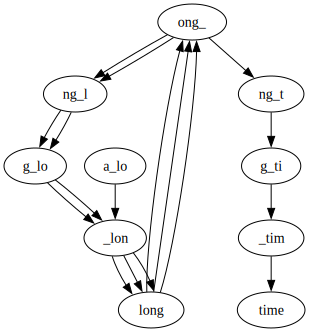

In [61]:
import graphviz
from IPython.display import display

display(graphviz.Source(visualize_de_bruijn('a_long_long_long_time', 5)))